# Exercise 2b: Arithmetic and Aggregation

## Aim: Learn to do computation with xarray

Find the teaching materials here: https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html

### Issues covered: 
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [25]:
import xarray as xr
ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature=ds['temp']
lat=ds['latitude']
lon=ds['longitude']
ds

<xarray.Dataset> Size: 13MB
Dimensions:      (longitude: 288, latitude: 144, depth: 20, t: 1,
                  longitude_1: 288, latitude_1: 143)
Coordinates:
  * longitude    (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude     (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * depth        (depth) float32 80B 5.0 15.0 25.0 ... 4.577e+03 5.192e+03
  * t            (t) object 8B 1920-04-16 00:00:00
  * longitude_1  (longitude_1) float32 1kB 0.625 1.875 3.125 ... 358.1 359.4
  * latitude_1   (latitude_1) float32 572B -88.75 -87.5 -86.25 ... 87.5 88.75
Data variables:
    temp         (t, depth, latitude, longitude) float32 3MB ...
    salinity     (t, depth, latitude, longitude) float32 3MB ...
    ucurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
    vcurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
Attributes:
    history:      Tue Sep 12 11:49:35 BST 2006 - CONVSH V1.91 16-February-2006
    Conventions:  CF-1.0

Q2. Let's compare the data between the sea surface and further down. Create two temperature datasets and extract the temperature change data the sea surface and the sea bottom

In [6]:
temp_surface = temperature.isel(depth=0).squeeze()
temp_bottom = temperature.isel(depth=-1).squeeze()

Q3. Calculate the difference in temperature the bottom of the ocean and the surface.

In [9]:
temp_difference = temp_surface -temp_bottom
temp_difference

<xarray.DataArray 'temp' (latitude: 144, longitude: 288)> Size: 166kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(144, 288), dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
    t          object 8B 1920-04-16 00:00:00

Q4. Plot the difference in these temperatures using xarrays built-in features.

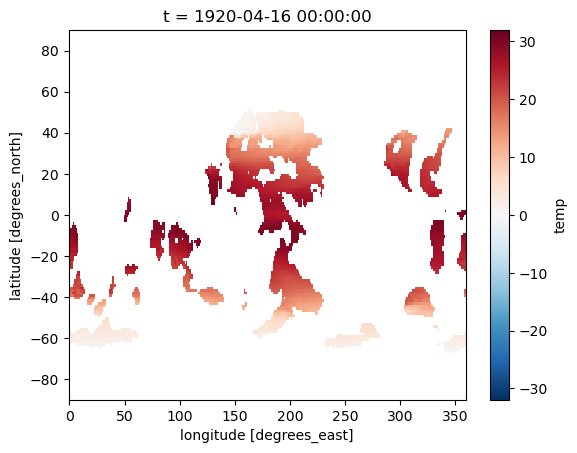

In [10]:
temp_difference.plot()

Q5. Calculate the **minimum** temperature across the water depth in all locations.

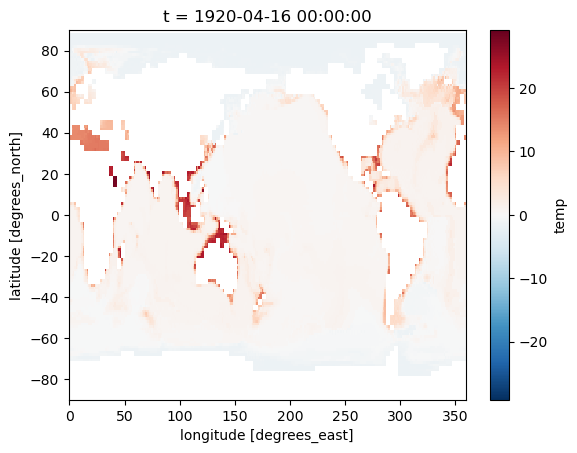

In [16]:
temperature.min(dim='depth').plot()

Q6. Compute the global average ocean temperature change (averaged over all depths) for the entire time period in the dataset. Then display the result as a 2D depth profile.

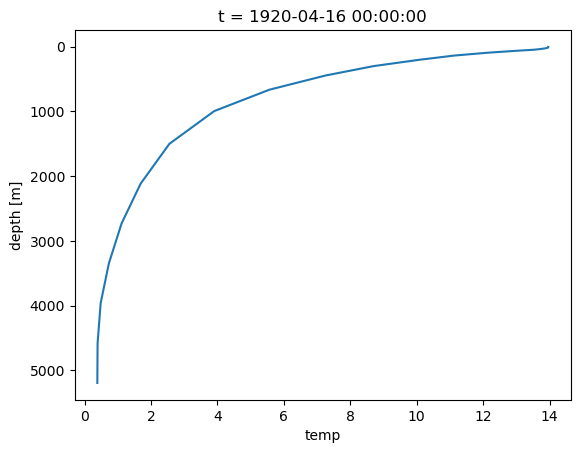

In [33]:

import matplotlib.pyplot as plt
temp_change = temperature.mean(dim=['latitude','longitude'])
temp_change.plot(y='depth')
plt.gca().invert_yaxis()

Q7. Calculate the zonal average temperature change for each latitude. Plot the result as a 2d contour with depth on the y axis and latitude on x.